# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [148]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
CSV_PATH = './data/raw/penguins.csv'

penguins_df = pd.read_csv(CSV_PATH)

penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


## Tasks

Utilize your unsupervised learning skills to reduce dimensionality and identify clusters in the penguins dataset!

### First

* Begin by reading in "`penguins.csv`" as a pandas DataFrame called `penguins_df`, then investigate and clean the dataset by removing the null values and outliers. Save as a cleaned DataFrame called `penguins_clean`.

In [149]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [150]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [151]:
penguins_df = penguins_df.dropna()

penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.7+ KB


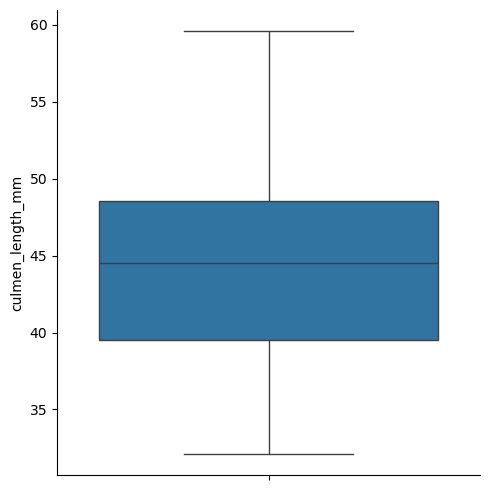

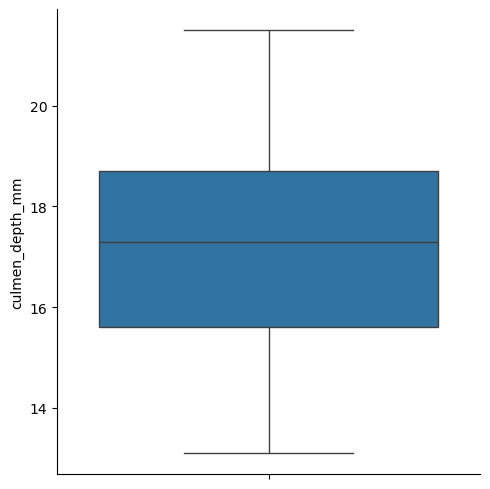

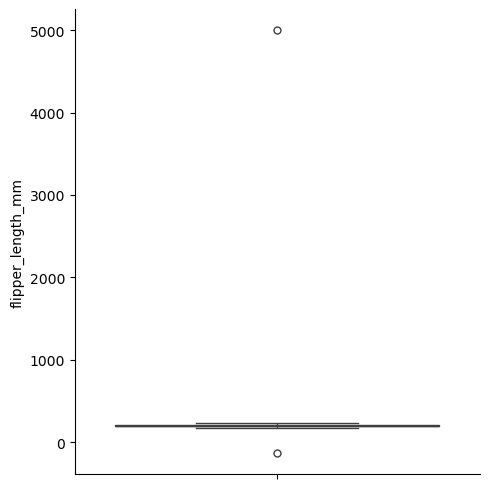

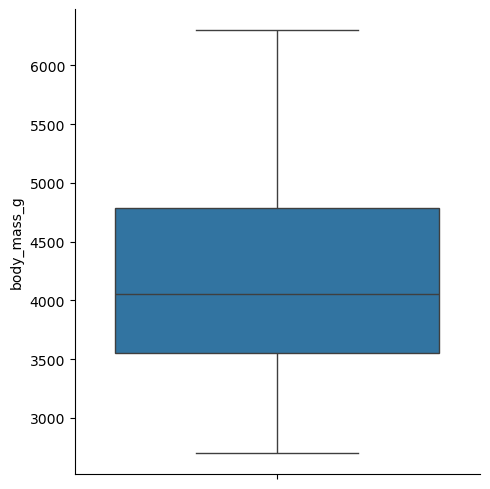

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

features_to_plot = penguins_df.drop('sex', axis=1).columns

for feature in features_to_plot:
    sns.catplot(data=penguins_df[feature],
                kind='box')
    

In [153]:
Q1 = penguins_df['flipper_length_mm'].quantile(.25)
Q3 = penguins_df['flipper_length_mm'].quantile(.75)

lower_limit_filter = penguins_df['flipper_length_mm'] < 0
upper_limit_filter = penguins_df['flipper_length_mm'] > (Q3 + 1.5 * Q3 - Q1)

outlier_index = penguins_df[lower_limit_filter | upper_limit_filter].index

penguins_df.loc[outlier_index]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
9,42.0,20.2,5000.0,4250.0,MALE
14,34.6,21.1,-132.0,4400.0,MALE


In [154]:
penguins_df = penguins_df.drop(outlier_index).reset_index(drop=True)

penguins_clean = penguins_df.copy()

penguins_clean.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


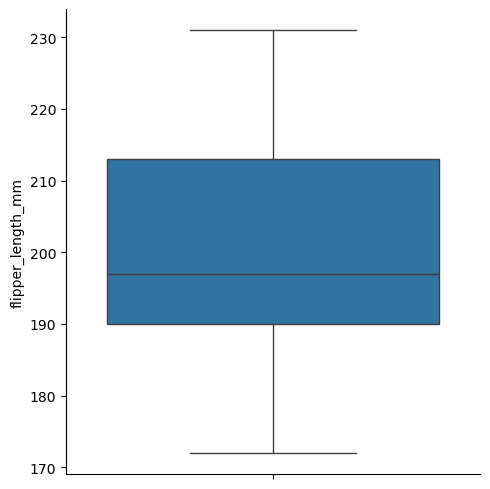

In [155]:
sns.catplot(data=penguins_clean['flipper_length_mm'],
            kind='box')

### Second

* Pre-process the cleaned data using standard scaling and the one-hot encoding to add dummy variables:

    * Create the dummy variables and remove the original categorical feature from the dataset.
    * Scale the data using the standard scaling method.
    * Save the updated data as a new DataFrame called `penguins_preprocessed`.

In [156]:
df = pd.concat([penguins_clean.drop('sex', axis=1),  
                pd.get_dummies(penguins_clean['sex'], 
                               prefix='sex_', 
                               drop_first=True)],
                               axis=1)

df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex__FEMALE,sex__MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
3,36.7,19.3,193.0,3450.0,True,False
4,39.3,20.6,190.0,3650.0,False,True


In [157]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_values = scaler.fit_transform(df)

penguins_preprocessed = pd.DataFrame(data=scaled_values,
                                     columns=penguins_preprocessed.columns)

penguins_preprocessed.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex__FEMALE,sex__MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001


### Third

* Perform Principal Component Analysis (PCA) on the penguins_preprocessed dataset to determine the desired number of components, considering any component with an explained variance ratio above 10% as a suitable component. Save the number of components as a variable called `n_components`.

    * Finally, execute PCA using `n_components` and store the result as `penguins_PCA`.

In [158]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)

pca.fit(penguins_preprocessed)

n_components = sum(pca.explained_variance_ratio_ > .1)

pca = PCA(n_components=n_components)

pca = pca.fit(penguins_preprocessed)

penguins_PCA = pca.fit_transform(penguins_preprocessed)

penguins_PCA

array([[-7.29520694e-01, -2.09719199e+00],
       [-1.92930440e+00,  4.12149703e-01],
       [-1.95352479e+00,  3.08485398e-01],
       [-2.28817761e+00, -1.58277726e-01],
       [-6.21821649e-01, -2.51402049e+00],
       [-2.29152165e+00,  1.26445549e-01],
       [ 2.70680676e-01, -1.85613349e+00],
       [-2.33416049e+00,  1.50781067e-01],
       [-5.97023288e-01, -2.65728372e+00],
       [-2.29097852e+00,  1.91722418e-01],
       [-2.03556313e+00,  1.40926894e-02],
       [ 4.03586127e-01, -2.13984589e+00],
       [-2.78682640e+00, -1.42762052e-01],
       [ 3.26341981e-01, -2.46479526e+00],
       [-2.80192041e+00, -2.54639414e-01],
       [-9.70630285e-01, -2.17804104e+00],
       [-2.25960046e+00, -1.47648262e-01],
       [-4.89541085e-01, -1.79101648e+00],
       [-6.35131373e-01, -1.64334482e+00],
       [-2.35187589e+00, -1.08021864e-01],
       [-6.59573801e-01, -2.04230703e+00],
       [-2.23509243e+00,  1.56193095e-01],
       [-3.04481322e+00, -4.48467094e-01],
       [-5.

### Fourth

* Employ k-means clustering on the `penguins_PCA` dataset, setting `random_state=42`, to determine the number of clusters through elbow analysis. Save the optimal number of clusters in a variable called `n_cluster`.

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

<Axes: >

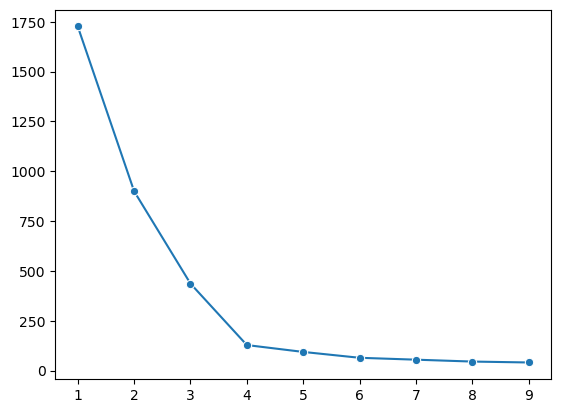

In [159]:
from sklearn.cluster import KMeans

inertia = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k,
                   random_state=42).fit(penguins_PCA)
    
    inertia.append(kmeans.inertia_)

sns.lineplot(x=range(1, 10),
             y=inertia,
             marker='o')

In [160]:
n_cluster = 4

### Fifth

* Create and fit a new k-means cluster model, setting `n_cluster` equal to your `n_cluster` variable, saving the model as a variable called `kmeans`.

    * Visualize your clusters using the first two principle components. 

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: >

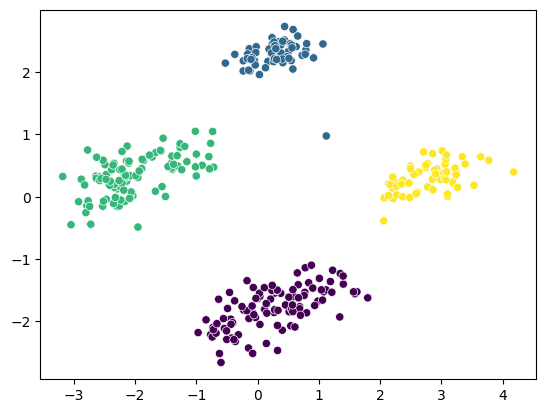

In [161]:
kmeans = KMeans(n_clusters=n_cluster,
                random_state=42).fit(penguins_PCA)

sns.scatterplot(x=penguins_PCA[:, 0],
            y=penguins_PCA[:, 1],
            c=kmeans.labels_)

### Sixth

* Add the label column extracted from the k-means clustering (using `kmeans.labels_`) to the `penguins_clean` DataFrame.

In [162]:
penguins_clean['label'] = kmeans.labels_

penguins_clean.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,label
0,39.1,18.7,181.0,3750.0,MALE,0
1,39.5,17.4,186.0,3800.0,FEMALE,2
2,40.3,18.0,195.0,3250.0,FEMALE,2
3,36.7,19.3,193.0,3450.0,FEMALE,2
4,39.3,20.6,190.0,3650.0,MALE,0


### Seventh

* Create a statistical table by grouping `penguins_clean` based on the "`label`" column and calculating the `mean` of each numeric column. Save this table as `stat_penguins`.

In [163]:
stat_penguins = penguins_clean[[*features_to_plot, 'label']].groupby(by='label').mean()

stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,43.878302,19.111321,194.764151,4006.603774
1,45.545763,14.262712,212.779661,4683.050847
2,40.217757,17.611215,189.046729,3419.158879
3,49.473770,15.718033,221.540984,5484.836066
